<a href="https://colab.research.google.com/github/rishav-ish/MachineLearning/blob/master/IrisClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data Set classification using perceptron

## Importing Require Library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Our Data

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header = None, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


As you can see we don't have any null value in our dataset, and we have 150 samples with 4 features or dimensions

In [14]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df[4].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: 4, dtype: int64

we have 3 target class for labelling, as given above
<li>Iris_versicolor</li>
<li>Iris-setosa</li>
<li>Iris-virginica</li>

<br>

For understanding purpose we will be using first 100 samples of our dataset that comprises of Iris-versicolor and Iris-setosa only, both are 50 and 50 samples so our dataset are well balanced

In [0]:
X = df.iloc[:100,:].values              #converting into numpy  array using values
y = df.iloc[:100,-1].values

let's plot our y to see our target value dataset

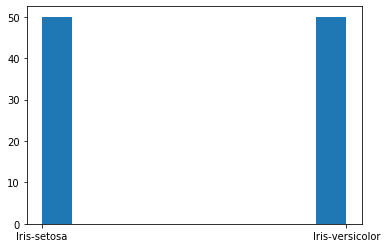

In [18]:
_ = plt.hist(y)                              #you can see that our data is well balanced
plt.show()